<a href="https://colab.research.google.com/github/baladalintang/balada/blob/master/STKI_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reasoning**:
The subtask requires importing the pandas library. This code block will import pandas using the standard alias 'pd'.



In [3]:
import pandas as pd               ## untuk membaca file csv
import numpy as np                ## untuk numerical
import matplotlib.pyplot as plt   ## untuk visualisasi
import seaborn as sns             ## untuk statistik

In [5]:
df = pd.read_excel('/content/Restaurant_Reviews.xlsx')

### Distribusi Label (Sentimen Ulasan)

In [7]:
df.head(10)

,Reviews,Labels
0,Wah... Suka sekali dengan tempat ini.,1
1,Keraknya tidak bagus.,0
2,Tidak enak dan teksturnya juga tidak enak.,0
3,Mampir saat libur bank akhir Mei atas rekomend...,1
4,"Pilihan pada menu sangat banyak, begitu pula d...",1
5,Sekarang aku jadi marah dan ingin memakan pho ...,0
6,Sejujurnya rasanya tidak SEGAR ITU.),0
7,Kentangnya seperti karet dan Anda bisa tahu ba...,0
8,Kentang gorengnya juga enak.,1
9,Sentuhan yang hebat.,1


/tmp/ipython-input-1794597613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Labels', data=df, palette='viridis')


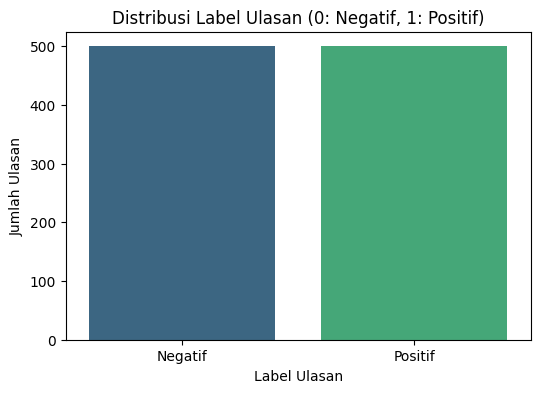

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Labels', data=df, palette='viridis')
plt.title('Distribusi Label Ulasan (0: Negatif, 1: Positif)')
plt.xlabel('Label Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(ticks=[0, 1], labels=['Negatif', 'Positif'])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1000 non-null   object
 1   Labels   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
##membuat term atau tokenisasi
!pip install Sastrawi
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.9 MB/s eta 0:00:00


In [15]:
print(df.columns)

Index(['Reviews', 'Labels'], dtype='object')


In [17]:
df.rename(columns={'Reviews': 'text', 'Labels': 'label'}, inplace=True)

In [18]:
# Case folding
df['text'] = df['text'].astype(str).str.lower()

In [19]:
# Tokenisasi (memecah kalimat jadi kata)
df['tokens'] = df['text'].apply(lambda x: re.findall(r'\b\w+\b', x))

In [21]:
import nltk
nltk.download('stopwords')
# Stopword removal (menghapus kata umum seperti "yang", "dan", dll.)
stop_words = set(stopwords.words('indonesian'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
df.head(100)

,text,label,tokens
0,wah... suka sekali dengan tempat ini.,1,[suka]
1,keraknya tidak bagus.,0,"[keraknya, bagus]"
2,tidak enak dan teksturnya juga tidak enak.,0,"[enak, teksturnya, enak]"
3,mampir saat libur bank akhir mei atas rekomend...,1,"[mampir, libur, bank, mei, rekomendasi, rick, ..."
4,"pilihan pada menu sangat banyak, begitu pula d...",1,"[pilihan, menu, harganya]"
...,...,...,...
95,kami tidak akan pergi lagi.,0,[pergi]
96,akan kembali lagi!,1,[]
97,makanan tiba dengan cepat!,1,"[makanan, cepat]"
98,itu tidak bagus.,0,[bagus]


In [24]:
# Stemming (mengubah kata ke bentuk dasar)
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [25]:
##Simpan hasil dan tampilkan contoh
# ============================================
df.to_csv("dataset_preprocessed.csv", index=False)

from google.colab import files
files.download("dataset_preprocessed.csv")

# Tampilkan contoh hasil
df[['text', 'tokens', 'stemmed', 'label']].head(10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,text,tokens,stemmed,label
0,wah... suka sekali dengan tempat ini.,[suka],[suka],1
1,keraknya tidak bagus.,"[keraknya, bagus]","[kerak, bagus]",0
2,tidak enak dan teksturnya juga tidak enak.,"[enak, teksturnya, enak]","[enak, tekstur, enak]",0
3,mampir saat libur bank akhir mei atas rekomend...,"[mampir, libur, bank, mei, rekomendasi, rick, ...","[mampir, libur, bank, mei, rekomendasi, rick, ...",1
4,"pilihan pada menu sangat banyak, begitu pula d...","[pilihan, menu, harganya]","[pilih, menu, harga]",1
5,sekarang aku jadi marah dan ingin memakan pho ...,"[marah, memakan, pho, sialanku]","[marah, makan, pho, sial]",0
6,sejujurnya rasanya tidak segar itu.),"[sejujurnya, segar]","[jujur, segar]",0
7,kentangnya seperti karet dan anda bisa tahu ba...,"[kentangnya, karet, kentang, disimpan, penghan...","[kentang, karet, kentang, simpan, hangat]",0
8,kentang gorengnya juga enak.,"[kentang, gorengnya, enak]","[kentang, goreng, enak]",1
9,sentuhan yang hebat.,"[sentuhan, hebat]","[sentuh, hebat]",1
